In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Variable Level Monitoring for Numerical Features (VLM_N)
##### This code is used to create variable level monitoring for numerical features
- Plot 1 shows mean values of feature by date
- Plot 2 shows change (1st order difference) in mean by date

In [2]:
def VLM_N(df, feature_col, date_col, figsize=(15, 5)):
    
# Parameter Instruction
    # df: Pandas DataFrame; DataFrame with date and feature to plot
    # feature_col: str; Name of column with feature to plot
    # date_col: str; Name of date column
    # figsize: tuple, optional; Size of each plot
    # -------------------------------------------
# Output
    # Two matplotlib charts

    
    # Plot 1: mean values of feature by date
    title = "Average of {f}".format(f=feature_col)
    
    df.fillna(0)
    df[feature_col] = df[feature_col].astype(float)
    average = pd.DataFrame(df.groupby(date_col)[feature_col].mean().reset_index(name=title))
    
    f, ax = plt.subplots(figsize=(15,5))
    plt.plot(average["Date"], average[title])
    plt.xlabel('Dates', fontsize = 10)
    plt.ylabel('Parameter mean values', fontsize = 10)
    plt.title(title)
    
    # Plot 2: change of feature in mean by date
    average['shift'] = average[title].shift(1)
    average.fillna(0, inplace = True)
    average = average.replace(0.0, 0.000001)   # --------------- Avoid 0 as denominator
    average['% change in mean'] = (average[title] - average['shift'])/average['shift']
    plot2 = average[1:]
    
    plt.figure(figsize=(15,5))
    plt.subplot()
    plt.plot(plot2['Date'], plot2['% change in mean'])
    plt.xlabel('Dates', fontsize = 10)
    plt.ylabel('% change in mean', fontsize = 10)
    plt.title("Change in {t}".format(t=title))

##### Example

In [3]:
df = pd.read_csv("DATA/VLM_N.csv")
df.head(10)

,Date,Feature_N
0,11/1/2018,0.308343
1,11/1/2018,0.310489
2,11/1/2018,0.868320
3,11/1/2018,0.278767
4,11/2/2018,0.877366
5,11/2/2018,0.164186
6,11/2/2018,0.071084
7,11/2/2018,0.125279
8,11/2/2018,0.384604
9,11/3/2018,0.334576


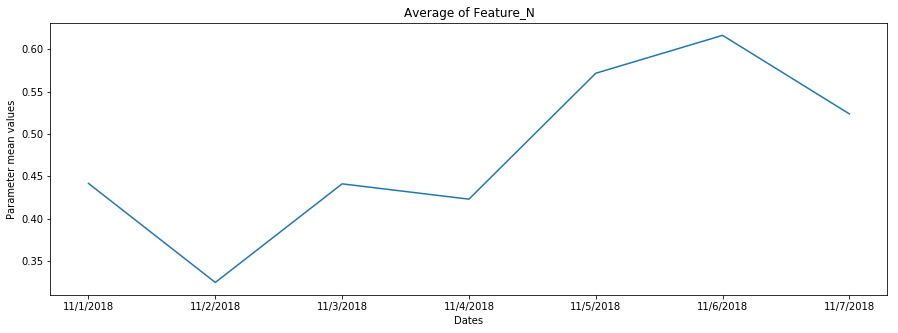

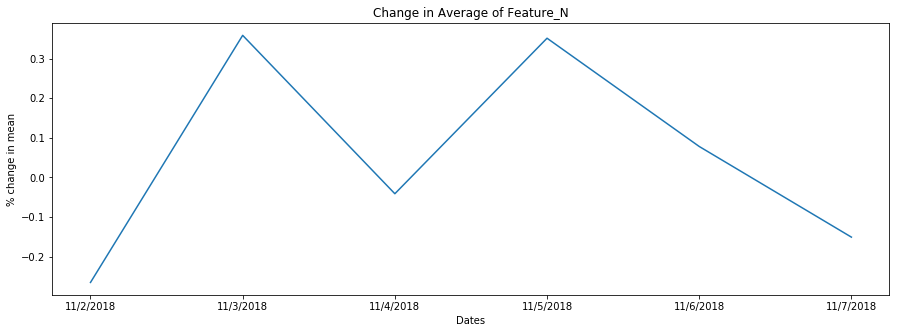

In [5]:
VLM_N(df = df
     ,feature_col = 'Feature_N'
     ,date_col = 'Date')